In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.filters as fl
from skimage.morphology import binary_dilation, binary_erosion, binary_closing, binary_opening
import skimage.util as ut

In [ ]:
# 1. Dilation and Erosion  
# 1.a. Apply dilation and erosion to “lung.jpg” using 3x3 square shaped structuring element. Before 
# applying dilation and erosion, you must perform the thersholding to make the input image into 
# binary one. Determine the threshold value by yourself.  
lung = plt.imread("lung.jpg")

#plt.figure(); plt.imshow(lung, cmap='gray')

# otsu_t = fl.threshold_otsu(lung)
thresh = 110
binary_lung = lung > thresh


square_SE = np.ones((3,3))
dilation_lung = binary_dilation(binary_lung, footprint=square_SE, mode='min')
erosion_lung = binary_erosion(binary_lung, footprint=square_SE, mode='min')

(np.float64(-0.5), np.float64(371.5), np.float64(289.5), np.float64(-0.5))

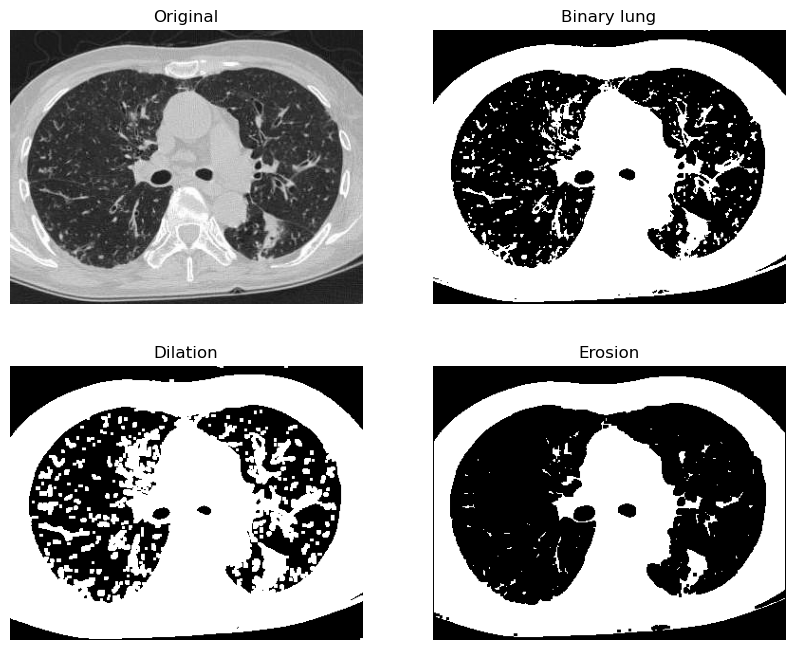

In [ ]:
# 1.b. Display the results of thresholding, dilation, and erosion. 

plt.figure(figsize=(10, 8));  plt.axis('off');
plt.subplot(221); plt.imshow(lung, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(222); plt.imshow(binary_lung, cmap='gray'); plt.title('Binary lung'); plt.axis('off')
plt.subplot(223); plt.imshow(dilation_lung, cmap='gray'); plt.title('Dilation'); plt.axis('off')
plt.subplot(224); plt.imshow(erosion_lung, cmap='gray'); plt.title('Erosion'); plt.axis('off')

(np.float64(-0.5), np.float64(371.5), np.float64(289.5), np.float64(-0.5))

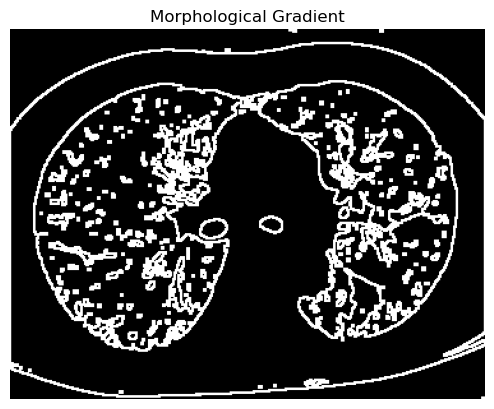

In [ ]:
# 1.c. Get morphological gradient of the binary image and display it. 
dilation_int = dilation_lung.astype('int')
erosion_int = erosion_lung.astype('int')

morphological_gradient = dilation_int - erosion_int


plt.figure(); plt.title('Morphological Gradient')
plt.imshow(morphological_gradient, cmap='gray'); plt.axis('off')

(np.float64(-0.5), np.float64(371.5), np.float64(289.5), np.float64(-0.5))

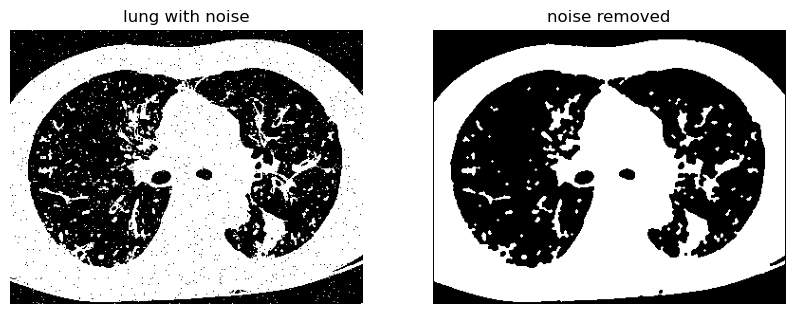

In [ ]:
# 2. Opening and Closing  
# 2.a. Add salt & pepper noise to the binary image you made in 1.a (noise density 0.02). 
# 2.b. Apply morphological operations to remove the noise.  

lung_sp = ut.random_noise(binary_lung, mode='s&p', amount=0.02)

plt.figure(figsize=(10, 4));  plt.axis('off');
plt.subplot(121); plt.imshow(lung_sp, cmap='gray'); plt.axis('off'); plt.title('lung with noise')

cross_SE = np.array([[0,1,0],[1,1,1],[0,1,0]])
sqaure_SE = np.ones((3,3))

lung_sp_open = binary_opening(lung_sp, footprint=cross_SE, mode='min')*1
lung_sp_close = binary_closing(lung_sp_open, footprint=square_SE, mode='min')*1


# plt.subplot(121); plt.imshow(lung_sp_open, cmap='gray'); plt.title('binary opening')
# plt.subplot(122); plt.imshow(lung_sp_close, cmap='gray'); plt.title('binary closing')
plt.subplot(122); plt.imshow(lung_sp_close, cmap='gray'); plt.title('noise removed'); plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

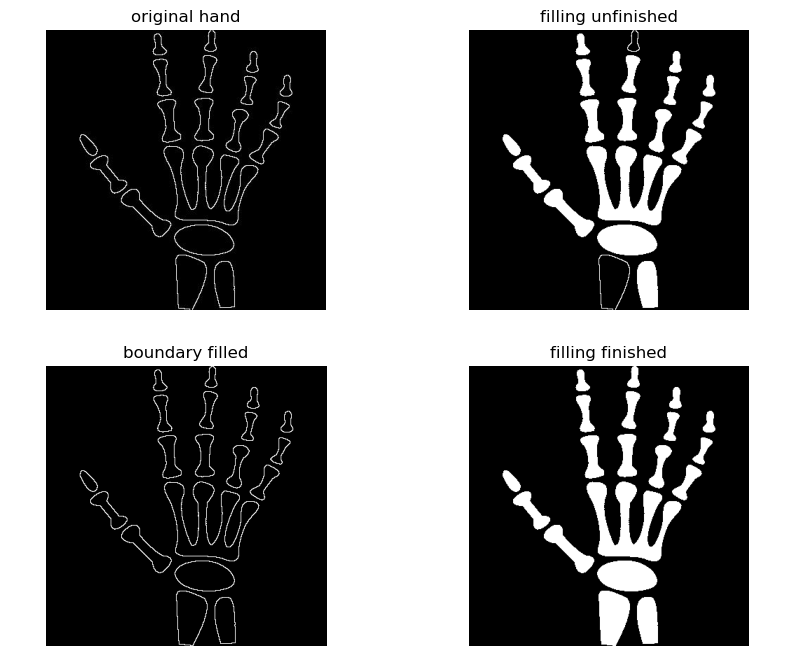

In [ ]:
# 3. Region Filling and Skeletonization 
# 3.a. Apply a region filling method to the “hand.jpg”. Fill the bone areas.  
hand = plt.imread('hand.jpg')

plt.figure(figsize=(10, 8));  plt.axis('off'); 
plt.subplot(221); plt.imshow(hand, cmap='gray')
plt.title('original hand'); plt.axis('off')

otsu_t = fl.threshold_otsu(hand) # binary image로 만들고
binary_hand = hand > otsu_t
hand_fill1 = ndi.binary_fill_holes(binary_hand, square_SE)
plt.subplot(222); plt.imshow(hand_fill1, cmap='gray') # 다 안채워짐
plt.title('filling unfinished'); plt.axis('off')


# 끝 경계 채워줌
binary_hand[0, 236:238] = 1
binary_hand[-1, 206:209] = 1

plt.subplot(223); plt.imshow(binary_hand, cmap='gray') # 경계채움
plt.title('boundary filled'); plt.axis('off')
#plt.figure(); plt.imshow(binary_hand, cmap='gray')

hand_fill = ndi.binary_fill_holes(binary_hand, square_SE)
plt.subplot(224); plt.imshow(hand_fill, cmap='gray') 
plt.title('filling finished'); plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

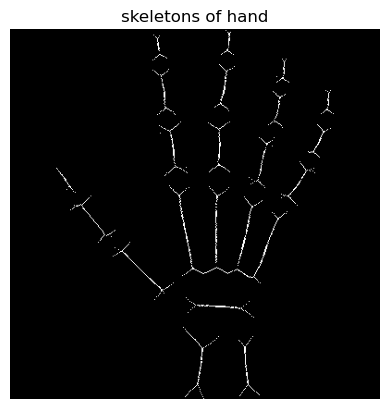

In [ ]:
# 3.b. Generate the skeletons of the results of 3.a. Determine the appropriate structuring element.  
def bwskel(image, se):
    nr,nc = image.shape
    skel = np.zeros((nr,nc))
    er = image.copy()
    while er.any():
        op = binary_opening(er, footprint=se, mode='min')*1
        skel += (er-op)
        er = binary_erosion(er, footprint=se, mode='min')
    return skel.astype('bool')

B = np.array([[0,1,0],[1,1,1],[0,1,0]])

hand_skeleton = bwskel(hand_fill, B)
plt.figure()
plt.imshow(hand_skeleton, cmap='gray')
plt.title('skeletons of hand'); plt.axis('off')

In [ ]:
# 3.c. From the result of 3.a, write a program to count the number of bones from the regioned filled image.  


structure_8conn = np.ones((3, 3))

labeled_array, num_bones = ndi.label(hand_fill, structure=structure_8conn)


print(f"Detected number of bones: {num_bones}")

Detected number of bones: 19


In [ ]:
# 4. Segmentation  
# Do the segmentation of lung in the CT scan using thresholding, edge detection and morphological 
# operations. Display the result as shown below.

lungCT = plt.imread('lungCT.png')
if lungCT.ndim == 3:
    lungCT = lungCT[:, :, 0]

lungCT = (lungCT*255).astype(np.uint8)
#plt.figure(); plt.imshow(lungCT, cmap='gray')

thresh_val = 145#fl.threshold_otsu(lungCT)
binary_mask = lungCT > thresh_val
#plt.figure(); plt.imshow(binary_mask, cmap='gray')


cross_SE = np.array([[0,1,0],[1,1,1],[0,1,0]])
sqaure_SE = np.ones((3,3))

lungCT_open = binary_opening(binary_mask, footprint=cross_SE, mode='min')*1
lungCT_close = binary_closing(lungCT_open, footprint=square_SE, mode='min')*1
#plt.figure(); plt.imshow(lungCT_close, cmap='gray')

square_SE = np.ones((5, 5))
lung_filled = ndi.binary_opening(lungCT_close, structure=square_SE, iterations=3)
#plt.figure(); plt.imshow(lung_filled, cmap='gray')

In [ ]:
body_solid = ndi.binary_fill_holes(lung_filled)
lungs_only = body_solid ^ lung_filled

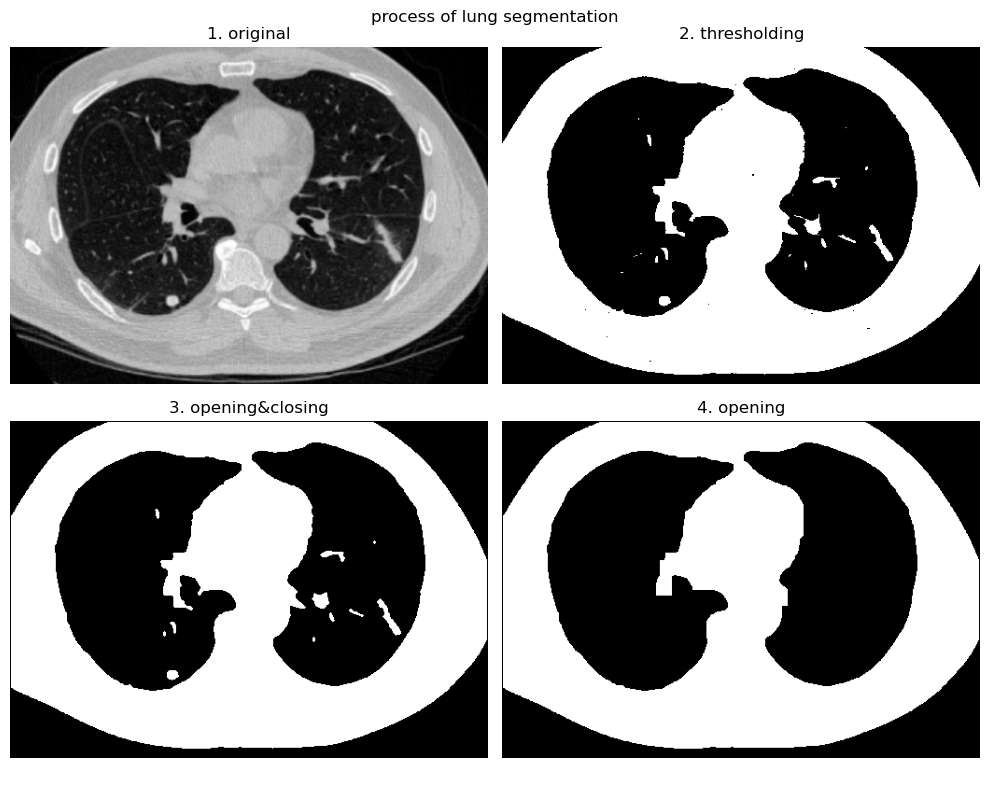

In [ ]:
plt.figure(figsize=(10, 8)); plt.title('process of lung segmentation'); plt.axis('off');
plt.subplot(221); plt.imshow(lungCT, cmap='gray'); plt.axis('off'); plt.title("1. original");
plt.subplot(222); plt.imshow(binary_mask, cmap='gray'); plt.axis('off'); plt.title("2. thresholding");
plt.subplot(223); plt.imshow(lungCT_close, cmap='gray'); plt.axis('off'); plt.title("3. opening&closing");
plt.subplot(224); plt.imshow(lung_filled, cmap='gray'); plt.axis('off'); plt.title("4. opening");
plt.tight_layout()
plt.show()

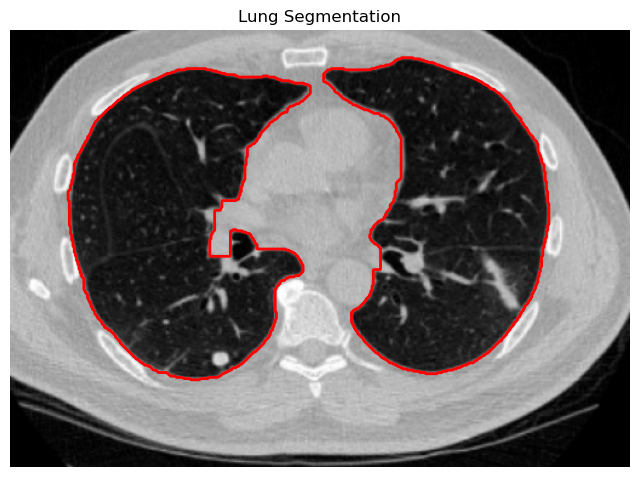

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(lungCT, cmap='gray')
plt.contour(lungs_only, colors='red', linewidths=2.0, levels=[0.5])
plt.title("Lung Segmentation"); plt.axis('off'); plt.show()